In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
os.getcwd()

'/home/david/Documentos/Analisisdevariables/Graficar boxplots'

In [2]:
%cd /home/david/Vídeos
datos = pd.read_csv("Prueba2_5octubre.csv")
datos.head()

datos=datos.drop(datos.index[3453])

datos=datos.drop(datos.index[3719])

datos=datos.drop(datos.index[4390])

datos=datos.drop(datos.index[4405])

datos=datos.drop(datos.index[5441])

datos=datos.drop(datos.index[6156]) #copias de grabaciones

/home/david/Vídeos


,filename,ACI,NDSI,M,mba,bnf,fm,we,rms,cf,...,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11,PSD,Transformacion
0,JSC5069/20151212/JSC5069__0__20160123_113000.wav,44801.716727,-0.538013,780.042161,0.059329,1.018535e-06,40.128857,0.334042,90.365825,0.000009,...,0.295222,0.287452,0.273530,0.283489,0.261704,0.267879,0.272452,0.298606,9.064291e-12,Baja
1,JSC5069/20151212/JSC5069__0__20160123_112000.wav,44933.769617,-0.422650,784.002806,0.077283,1.030661e-06,40.091729,0.354079,90.799645,0.000010,...,0.273621,0.269145,0.282137,0.279635,0.257106,0.282537,0.278378,0.297038,9.212817e-12,Baja
2,JSC5069/20151212/JSC5069__0__20160123_111000.wav,45179.565879,-0.419848,783.000002,0.056206,9.722514e-07,40.078502,0.370221,90.682266,0.000019,...,0.265304,0.277285,0.274641,0.256216,0.231944,0.173736,0.164789,0.286746,9.548949e-12,Baja
3,JSC5069/20151212/JSC5069__0__20160123_110000.wav,44712.248654,-0.337669,783.014655,0.053864,1.011822e-06,40.153468,0.330717,90.654119,0.000009,...,0.293045,0.292733,0.296838,0.286448,0.262351,0.280482,0.281848,0.305968,8.731838e-12,Baja
4,JSC5069/20151212/JSC5069__0__20160123_105000.wav,44954.261623,-0.376438,785.192845,0.058548,9.837448e-07,40.123701,0.347451,90.965416,0.000032,...,0.254269,0.248805,0.260823,0.280958,0.264476,0.290706,0.276969,0.293359,8.954198e-12,Baja


In [3]:
d=datos.iloc[:,1:22]

In [4]:
x= StandardScaler().fit_transform(d.values)  ##give numpy array values
scalx=pd.DataFrame(x,index=d.index,columns=d.columns) #so we need to transform it 
d=scalx.copy()
scalx.head()

,ACI,NDSI,M,mba,bnf,fm,we,rms,cf,ADIm1,...,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11,PSD
0,-0.460862,-1.930644,0.093333,0.234009,-0.335971,0.373458,0.423767,0.079145,-0.364066,0.611805,...,0.739324,0.868361,0.733059,0.445810,0.847040,0.291831,0.112653,0.021646,0.584018,-0.090085
1,-0.358654,-1.705088,0.101014,0.614602,-0.335396,0.155471,0.517782,0.086816,-0.363599,0.297947,...,0.145459,0.345752,0.307512,0.618489,0.757092,0.198857,0.404042,0.159219,0.540428,-0.090084
2,-0.168410,-1.699610,0.099069,0.167819,-0.338167,0.077809,0.593522,0.084740,-0.360428,0.709098,...,0.437215,0.144550,0.496723,0.468089,0.210593,-0.309982,-1.758763,-2.477642,0.254195,-0.090082
3,-0.530109,-1.538936,0.099098,0.118176,-0.336290,0.517958,0.408164,0.084243,-0.364076,0.579777,...,0.731644,0.815703,0.855805,0.913438,0.916094,0.304927,0.363195,0.239755,0.788757,-0.090087
4,-0.342793,-1.614736,0.103322,0.217462,-0.337622,0.343188,0.486683,0.089747,-0.355877,0.422184,...,0.107980,-0.122432,-0.165276,0.190848,0.787971,0.347901,0.566429,0.126507,0.438109,-0.090086


In [5]:
df=scalx.copy()
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out


In [6]:
df.describe()

,ACI,NDSI,M,mba,bnf,fm,we,rms,cf,ADIm1,...,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11,PSD
count,1.837100e+04,1.837100e+04,1.837100e+04,1.837100e+04,1.837100e+04,1.837100e+04,1.837100e+04,1.837100e+04,1.837100e+04,1.837100e+04,...,1.837100e+04,1.837100e+04,1.837100e+04,1.837100e+04,1.837100e+04,1.837100e+04,1.837100e+04,1.837100e+04,1.837100e+04,1.837100e+04
mean,-2.190229e-16,5.613059e-17,-2.895186e-16,-2.005104e-15,9.346155e-16,9.914102e-15,-8.038212e-16,6.297710e-16,1.490940e-15,-1.209216e-15,...,1.231295e-15,-3.175476e-16,2.045413e-15,-2.244719e-15,-1.016479e-15,1.077649e-16,-2.014731e-16,-6.397486e-16,1.412768e-16,3.725647e-16
std,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,...,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00
min,-3.278181e+01,-2.814391e+00,-1.222140e+00,-1.023602e+00,-3.680475e-01,-2.983666e+01,-1.139950e+00,-1.346944e+00,-3.650473e-01,-9.444249e+00,...,-7.213828e+00,-6.199208e+00,-5.856088e+00,-5.006549e+00,-5.702105e+00,-4.900153e+00,-5.146067e+00,-6.265254e+00,-7.595602e+00,-9.013627e-02
25%,-4.041611e-01,-8.185705e-01,-6.761507e-01,-8.581267e-01,-3.196151e-01,-2.177357e-01,-8.073350e-01,-7.212923e-01,-3.624645e-01,-1.058609e-01,...,-3.901019e-01,-3.700854e-01,-3.556884e-01,-2.959907e-01,-4.370255e-01,-4.585145e-01,-1.913654e-01,-1.574066e-01,-1.387386e-01,-9.001226e-02
50%,-1.402317e-01,2.942146e-01,1.057972e-01,-4.609864e-01,-2.742911e-01,1.744520e-01,-3.081385e-01,9.327855e-02,-3.540114e-01,2.851002e-01,...,3.088687e-01,2.276037e-01,2.169270e-01,2.600176e-01,1.648734e-01,1.934148e-01,3.326369e-01,3.481923e-01,2.861459e-01,-8.944718e-02
75%,2.909105e-01,9.359538e-01,1.224770e-01,9.124570e-01,-1.710793e-01,3.863944e-01,4.929475e-01,1.108492e-01,-2.729125e-01,5.107459e-01,...,6.870910e-01,6.908295e-01,6.854863e-01,6.495767e-01,6.649051e-01,7.661592e-01,6.269497e-01,5.859111e-01,5.463417e-01,-8.488566e-02
max,1.504308e+01,1.074697e+00,4.761589e+01,1.673643e+00,5.957258e+01,1.731365e+01,3.516123e+00,3.839927e+01,1.010753e+01,1.297517e+00,...,1.474676e+00,1.470097e+00,1.532715e+00,1.364967e+00,1.651248e+00,1.483405e+00,1.285991e+00,1.109408e+00,1.214842e+00,9.303460e+01


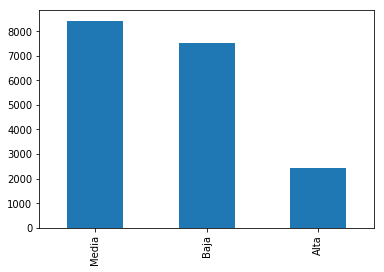

In [7]:
datos['Transformacion'].value_counts().plot(kind='bar')

In [8]:
scalx.columns
scalx.columns[0]


'ACI'

In [9]:
a=remove_outlier(df,scalx.columns[0])
a=remove_outlier(a, scalx.columns[1])
a=remove_outlier(a, scalx.columns[2])
a=remove_outlier(a, scalx.columns[3])
a=remove_outlier(a, scalx.columns[4])
a=remove_outlier(a, scalx.columns[5])
a=remove_outlier(a, scalx.columns[6])
a=remove_outlier(a, scalx.columns[7])
a=remove_outlier(a, scalx.columns[8])
a=remove_outlier(a, scalx.columns[9])
a=remove_outlier(a, scalx.columns[10])
a=remove_outlier(a, scalx.columns[11])
a=remove_outlier(a, scalx.columns[12])
a=remove_outlier(a, scalx.columns[13])
a=remove_outlier(a, scalx.columns[14])
a=remove_outlier(a, scalx.columns[15])
a=remove_outlier(a, scalx.columns[16])
a=remove_outlier(a, scalx.columns[17])
a=remove_outlier(a, scalx.columns[18])
a=remove_outlier(a, scalx.columns[19])
a=remove_outlier(a, scalx.columns[20])


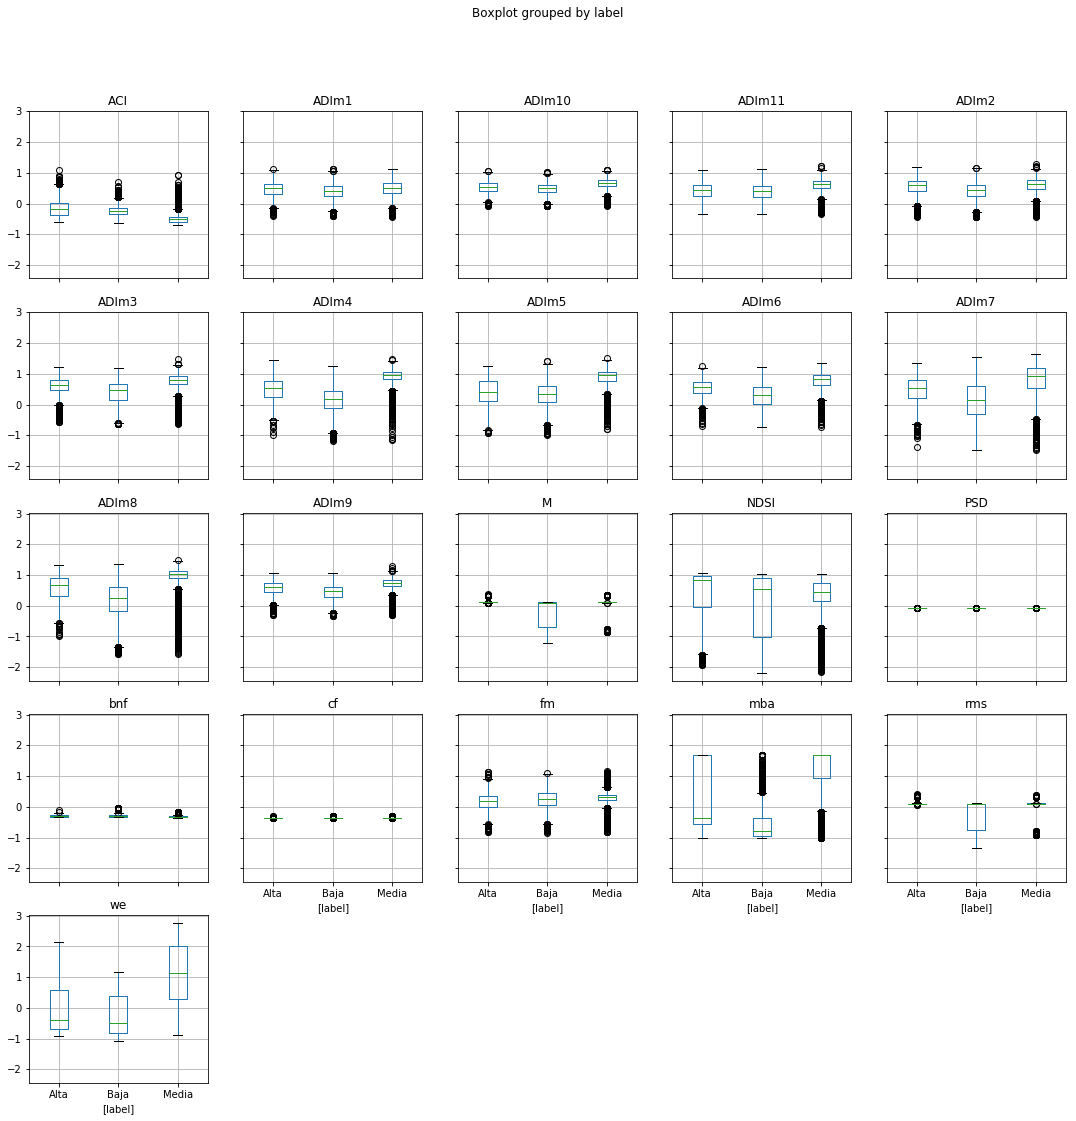

In [10]:

scalxlabel=a
scalxlabel['label']= datos.Transformacion
fig=scalxlabel.boxplot(figsize = (18,18),by='label')

In [11]:
scalxlabel['hora'] = datos['filename'].str.slice(-10,-8)
scalxlabel.head()

,ACI,NDSI,M,mba,bnf,fm,we,rms,cf,ADIm1,...,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11,PSD,label,hora
0,-0.460862,-1.930644,0.093333,0.234009,-0.335971,0.373458,0.423767,0.079145,-0.364066,0.611805,...,0.733059,0.445810,0.847040,0.291831,0.112653,0.021646,0.584018,-0.090085,Baja,11
1,-0.358654,-1.705088,0.101014,0.614602,-0.335396,0.155471,0.517782,0.086816,-0.363599,0.297947,...,0.307512,0.618489,0.757092,0.198857,0.404042,0.159219,0.540428,-0.090084,Baja,11
3,-0.530109,-1.538936,0.099098,0.118176,-0.336290,0.517958,0.408164,0.084243,-0.364076,0.579777,...,0.855805,0.913438,0.916094,0.304927,0.363195,0.239755,0.788757,-0.090087,Baja,11
4,-0.342793,-1.614736,0.103322,0.217462,-0.337622,0.343188,0.486683,0.089747,-0.355877,0.422184,...,-0.165276,0.190848,0.787971,0.347901,0.566429,0.126507,0.438109,-0.090086,Baja,10
6,-0.487916,-1.524276,0.108767,0.085081,-0.336739,0.460592,0.402889,0.094473,-0.363493,0.620814,...,0.784802,0.940132,1.091844,0.456381,0.480580,1.038530,0.658630,-0.090088,Baja,10


In [12]:
scals=scalxlabel.sort_values(by="hora")

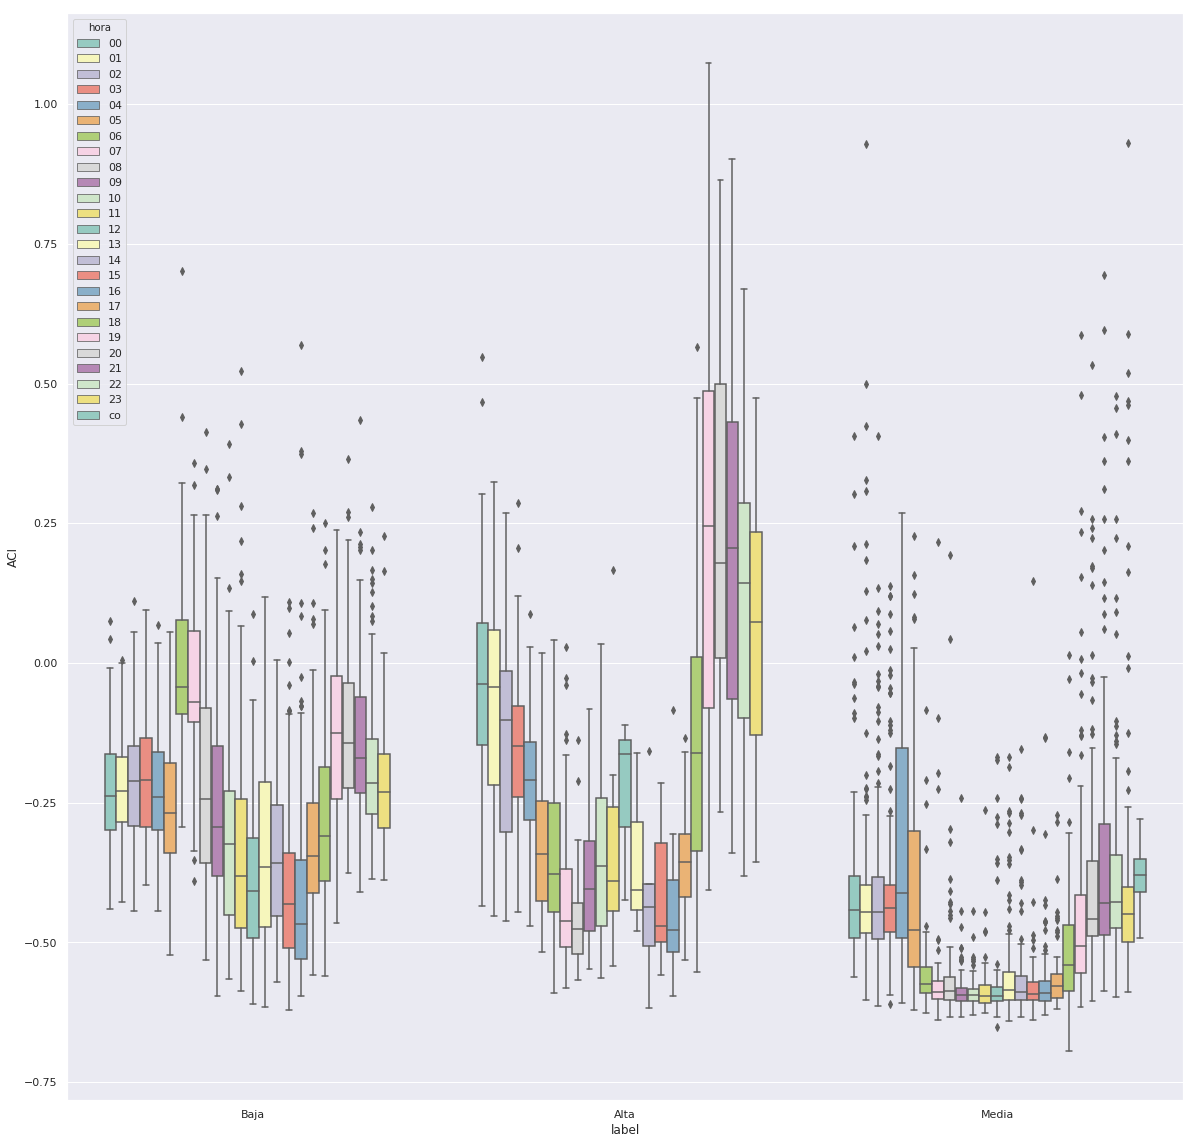

In [13]:
sns.set(rc={'figure.figsize':(20,20)})

ax = sns.boxplot(x="label", y="ACI", hue="hora", data=scals, palette="Set3")

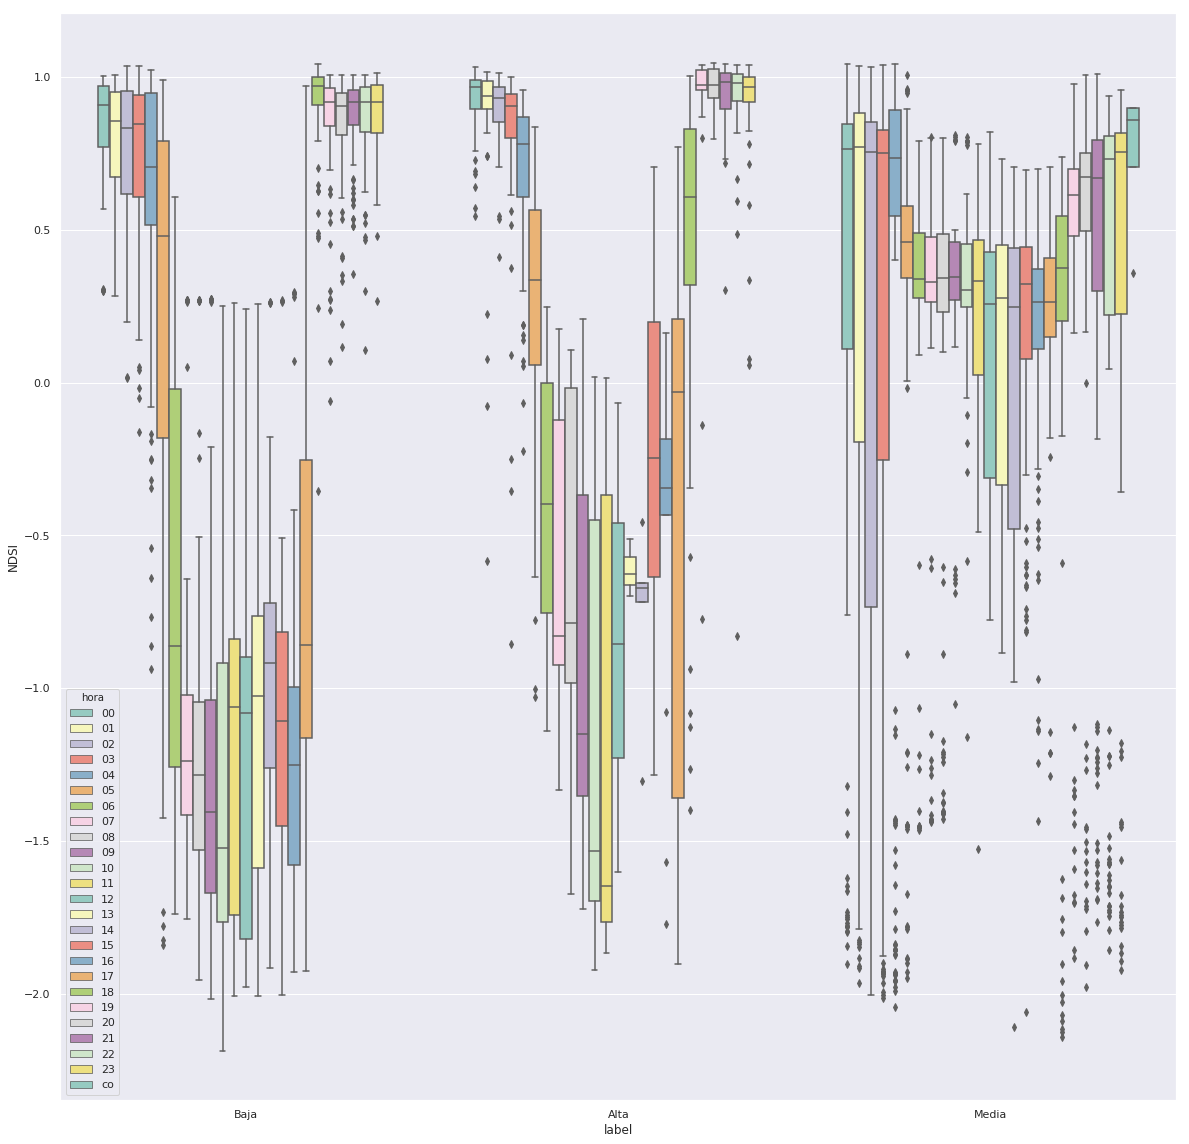

In [14]:
sns.set(rc={'figure.figsize':(20,20)})

ax = sns.boxplot(x="label", y="NDSI", hue="hora", data=scals, palette="Set3")

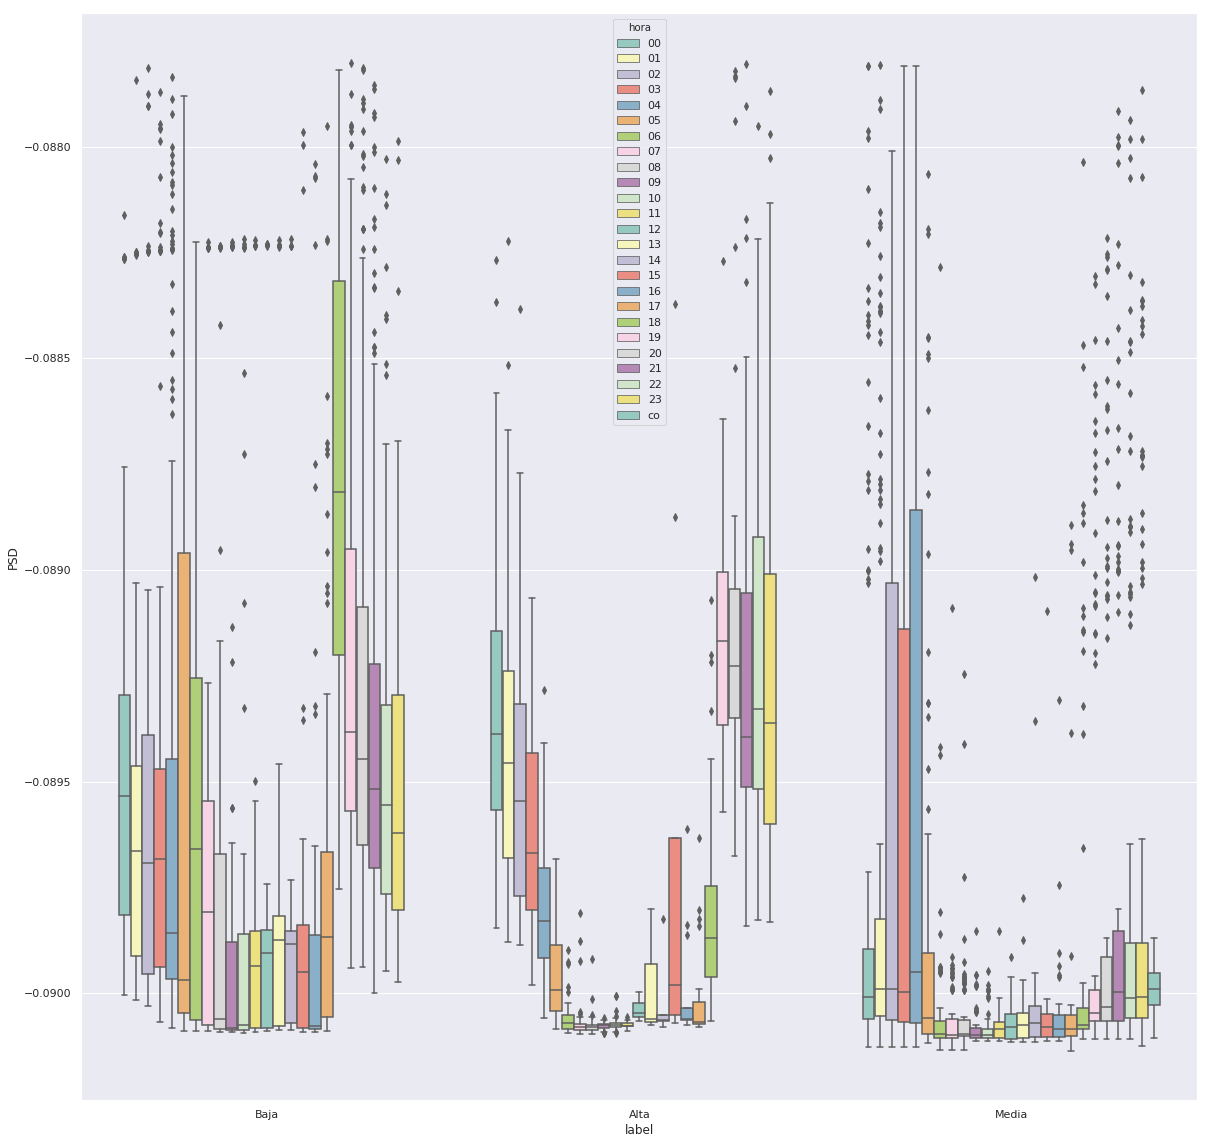

In [15]:
sns.set(rc={'figure.figsize':(20,20)})

ax = sns.boxplot(x="label", y="PSD", hue="hora", data=scals, palette="Set3")

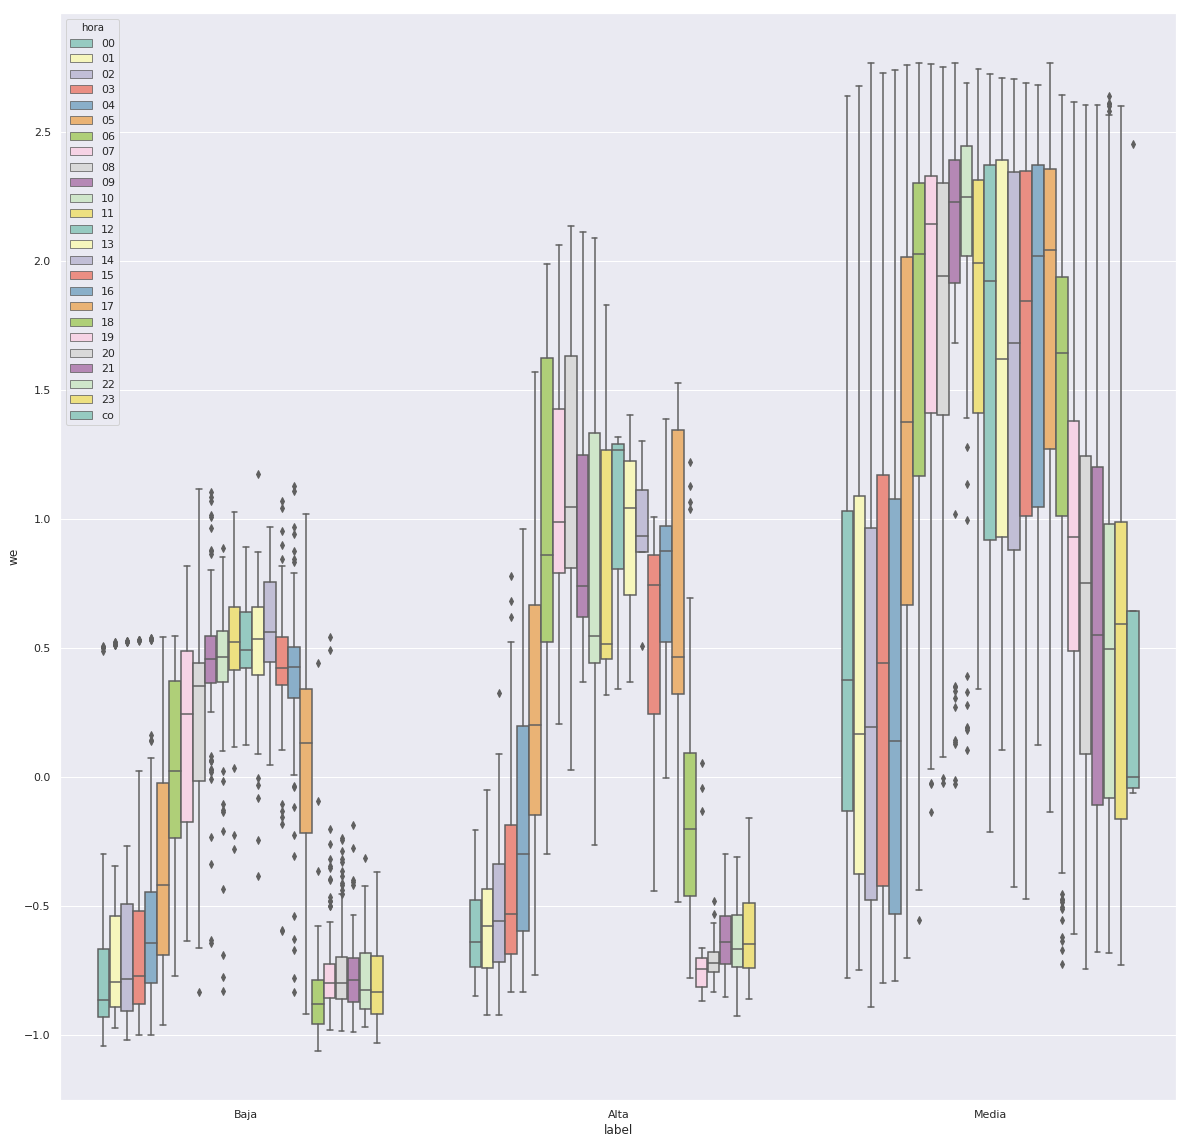

In [16]:
sns.set(rc={'figure.figsize':(20,20)})

ax = sns.boxplot(x="label", y="we", hue="hora", data=scals, palette="Set3")

In [54]:
scalxlabel['etapa'] = datos['filename'].str.slice(-10,-8).astype(int).apply(lambda x: 'e1' if 4<= x < 8 else ('e2' if 8< x < 16 else ('e3' if 16< x < 20 else 'e4')))

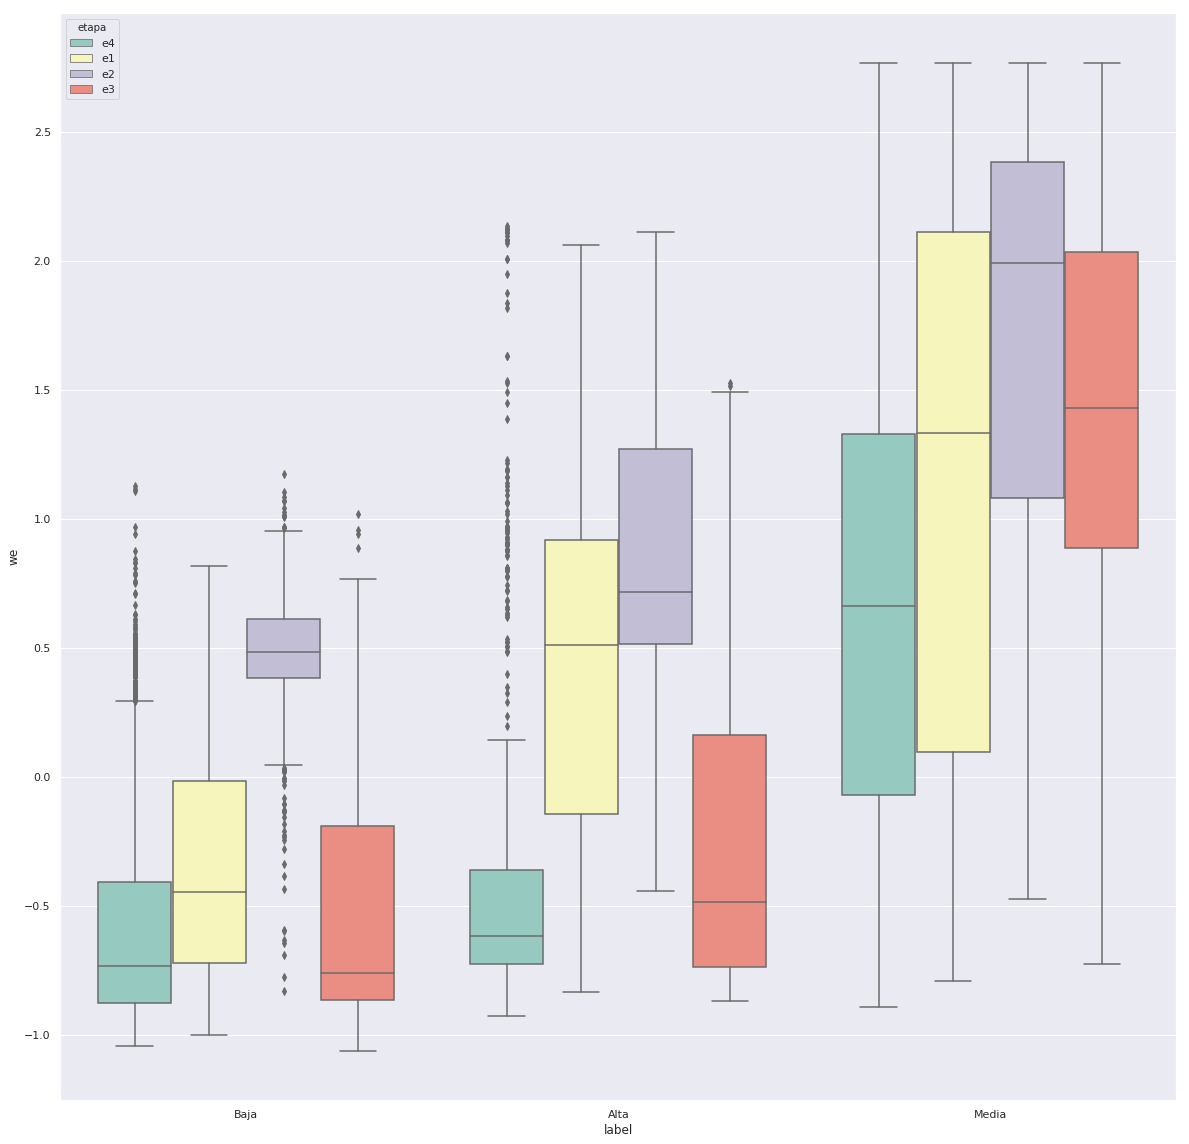

In [56]:
scals=scalxlabel.sort_values(by="hora")
ax = sns.boxplot(x="label", y="we", hue="etapa", data=scals, palette="Set3")

In [57]:
scals.to_csv('filt.csv')

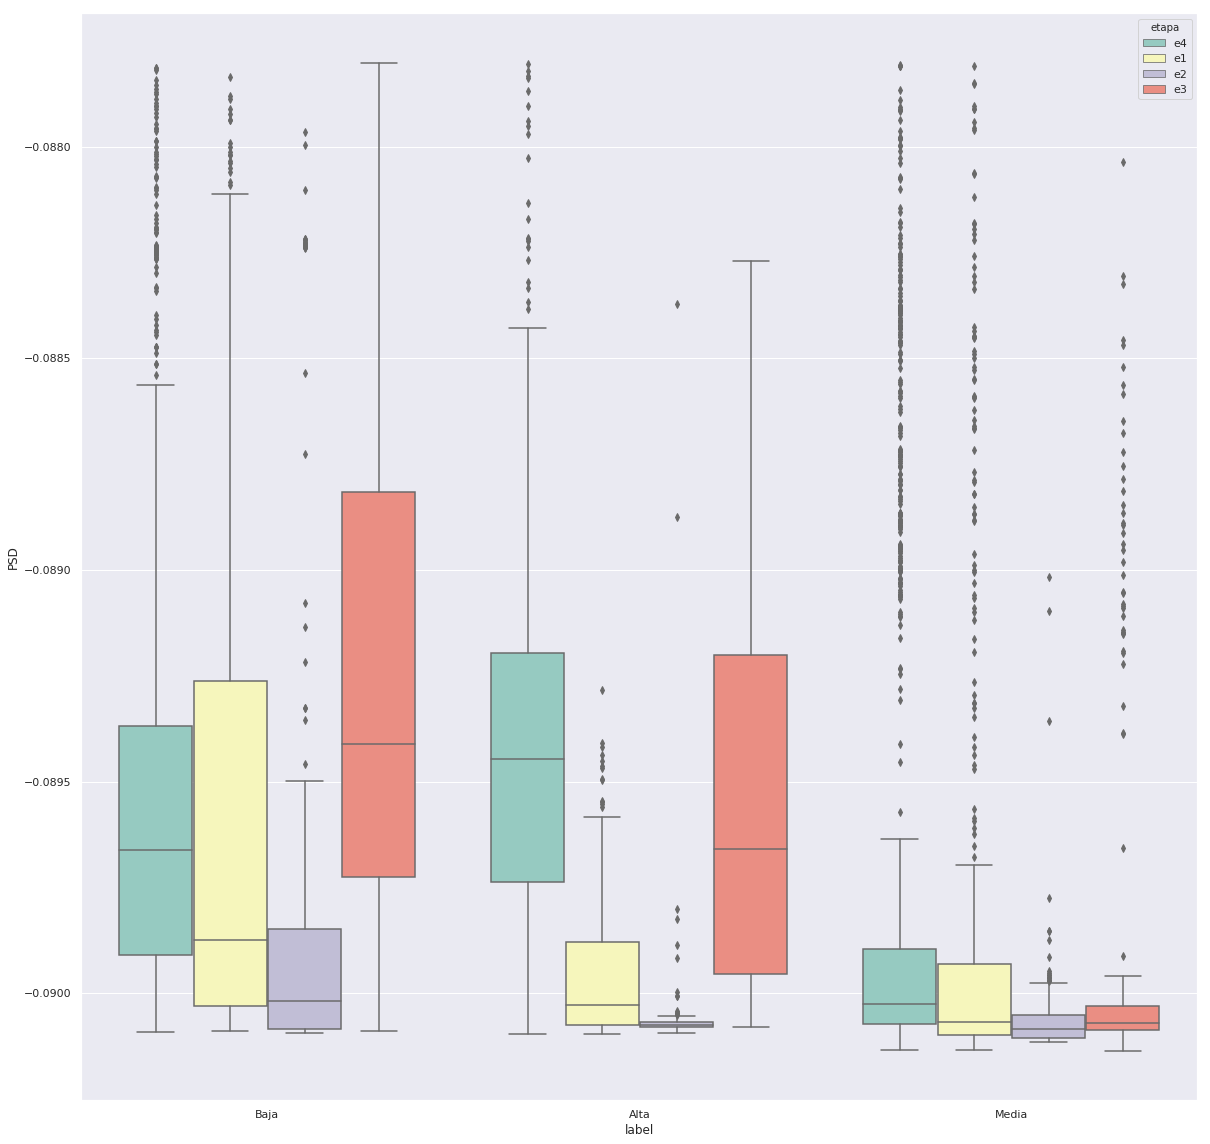

In [58]:
scals=scalxlabel.sort_values(by="hora")
ax = sns.boxplot(x="label", y="PSD", hue="etapa", data=scals, palette="Set3")